In [6]:
pip install numpy pandas matplotlib statsmodels


**IMPORT** **LABARIES**

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [8]:
#LOAD THE DATASET
df = pd.read_csv('/content/us-airlines-monthly-aircraft-miles-flown.csv', header=0, index_col=0, parse_dates=True) # Wrap 'AirPassengers.csv' in quotes to specify it as a string literal.

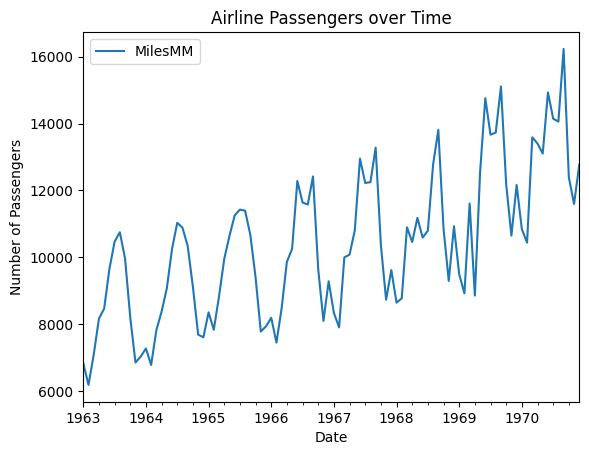

In [9]:
# Visualize the data
df.plot()
plt.title('Airline Passengers over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

**CHECK** **STATIONARY**

In [10]:
# ADF Test to check if the series is stationary
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

# Perform the test on the time series
adf_test(df)

ADF Statistic: 1.0229489778119758
p-value: 0.9945022811234028
The series is not stationary.


**CHECK** **DIFFRENCING**

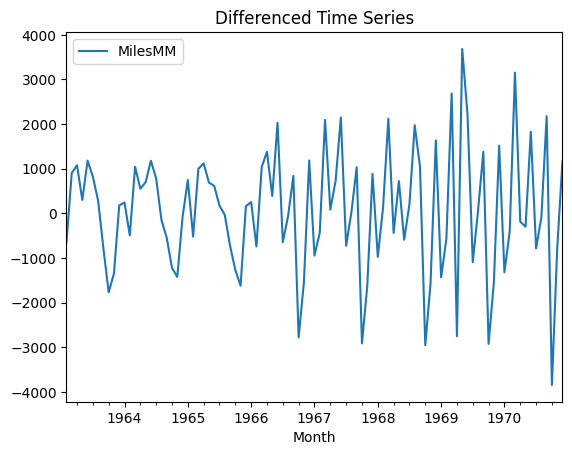

ADF Statistic: -8.948712377859025
p-value: 8.842915711306023e-15
The series is stationary.


In [11]:
df_diff = df.diff().dropna()
df_diff.plot()
plt.title('Differenced Time Series')
plt.show()

# Re-test for stationarity
adf_test(df_diff)


PLOT **ACF** AND **PACF**

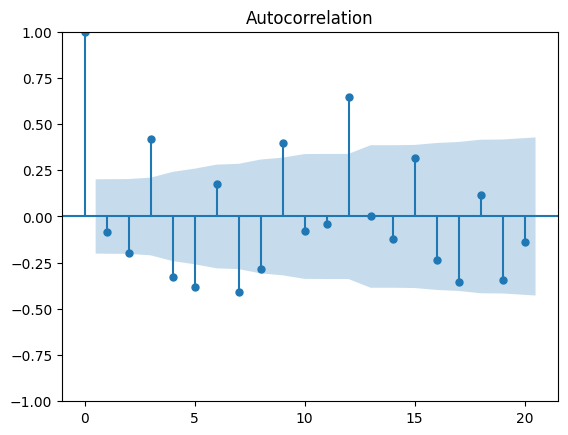

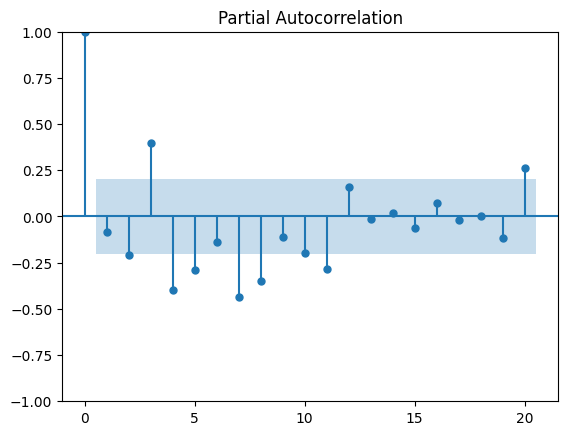

In [12]:
# Plot ACF and PACF
plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()


FIT **ARIMA** MODEL

In [13]:
# Fit ARIMA model
model = ARIMA(df, order=(1, 1, 1))
model_fit = model.fit()

# Model Summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

                               SARIMAX Results                                
Dep. Variable:                MilesMM   No. Observations:                   96
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -819.586
Date:                Thu, 05 Jun 2025   AIC                           1645.173
Time:                        23:07:59   BIC                           1652.834
Sample:                    01-01-1963   HQIC                          1648.269
                         - 12-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7089      0.149      4.755      0.000       0.417       1.001
ma.L1         -0.9197      0.086    -10.717      0.000      -1.088      -0.751
sigma2      1.811e+06   3.27e+05      5.538      0.0

**EVALUATE** **THE MODEL**

<ipython-input-14-e07b5fed8bc2>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecasted', color='red')


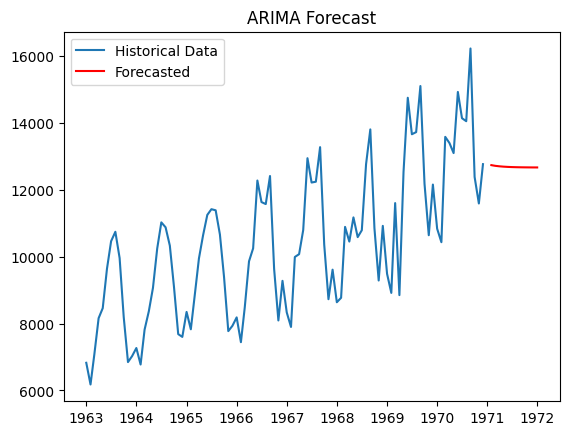

In [14]:
# Forecasting the next 12 time steps (e.g., next year)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.plot(df.index, df.values, label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, label='Forecasted', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


# SARIMA MODEL FOR SEASONALITY

In [15]:
# Fit SARIMA model
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (p, d, q, s)
sarima_model = SARIMAX(df, order=(1, 1, 1), seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# SARIMA model summary
print(sarima_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            MilesMM   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -668.828
Date:                            Thu, 05 Jun 2025   AIC                           1347.656
Time:                                    23:08:02   BIC                           1359.751
Sample:                                01-01-1963   HQIC                          1352.515
                                     - 12-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1880      0.131      1.440      0.150      -0.068       0.444
ma.L1         -0.8253      0.097   

FORECAST WITH **SARIMA**

<ipython-input-16-a46b38af2ab8>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='green')


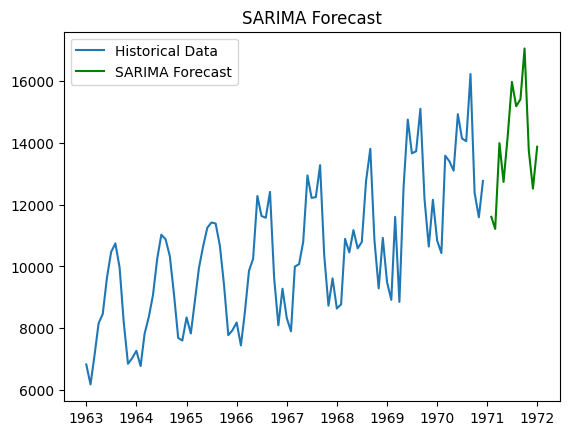

In [16]:
# Forecasting with SARIMA
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Plot SARIMA Forecast
plt.plot(df.index, df.values, label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


COMPARE **ARIMA** VS **SARIMA**

In [17]:
from sklearn.metrics import mean_squared_error

# Assuming you have a holdout set for testing (or using the last part of the dataset for evaluation)
y_test = df[-forecast_steps:]
arima_mse = mean_squared_error(y_test, forecast)
sarima_mse = mean_squared_error(y_test, sarima_forecast)

print(f'ARIMA MSE: {arima_mse}')
print(f'SARIMA MSE: {sarima_mse}')


ARIMA MSE: 2776024.5634759017
SARIMA MSE: 984487.1829348892


# **FB** prophet

In [36]:
# Prepare Data for Prophet
# Prophet requires a 'ds' (date) column and a 'y' (value) column.
# Since the date is already the index (and parsed as datetime), we rename the index to 'ds'.
df = df.rename_axis('df').reset_index() # Move the index to a column named 'ds'
# Import Prophet
from prophet import Prophet



In [37]:
# Now rename the value column to 'y'.
# The original column name is 'U.S. airlines: monthly aircraft miles flown (Millions)'
df = df.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions)': 'y'})


In [38]:
#Data ka Quick Check
print(df.head())
print(df.info())

   df         ds     y
0   0 1963-01-01  6827
1   1 1963-02-01  6178
2   2 1963-03-01  7084
3   3 1963-04-01  8162
4   4 1963-05-01  8462
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   df      96 non-null     int64         
 1   ds      96 non-null     datetime64[ns]
 2   y       96 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB
None


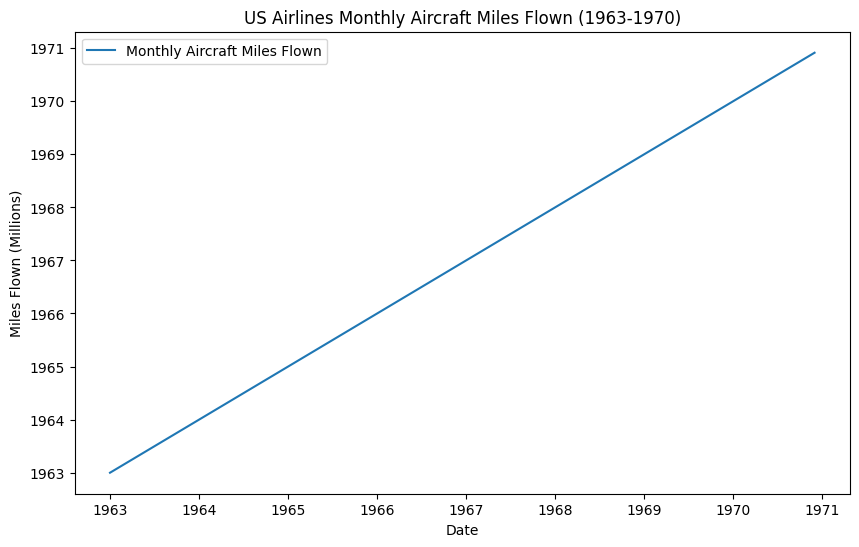

In [39]:
#Plot Original Data
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['ds'], label='Monthly Aircraft Miles Flown')
plt.title('US Airlines Monthly Aircraft Miles Flown (1963-1970)')
plt.xlabel('Date')
plt.ylabel('Miles Flown (Millions)')
plt.legend()
plt.show()

In [40]:
# Now rename the value column to 'y'.
# The original column name is 'U.S. airlines: monthly aircraft miles flown (Millions)'

# Print column names to verify the correct name of the value column
print(df.columns)

# After verifying the correct name, rename it to 'y'
# Replace 'MilesMM' with the actual column name if it's different
df = df.rename(columns={'MilesMM': 'y'})

Index(['df', 'ds', 'y'], dtype='object')


In [43]:
from prophet import Prophet
# %%
# Create Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df) # Fit the model with your dataframe

#Create Future Dataframe for Forecasting
future = model.make_future_dataframe(periods=24, freq='M')  # Agle 2 saal (24 months) ke liye future dataframe banao
forecast = model.predict(future)  # Forecast karo

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrbj4a8k/59z5ux9u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrbj4a8k/xb9bqnhr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84918', 'data', 'file=/tmp/tmpmrbj4a8k/59z5ux9u.json', 'init=/tmp/tmpmrbj4a8k/xb9bqnhr.json', 'output', 'file=/tmp/tmpmrbj4a8k/prophet_modelgq4c7n31/prophet_model-20250605232457.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

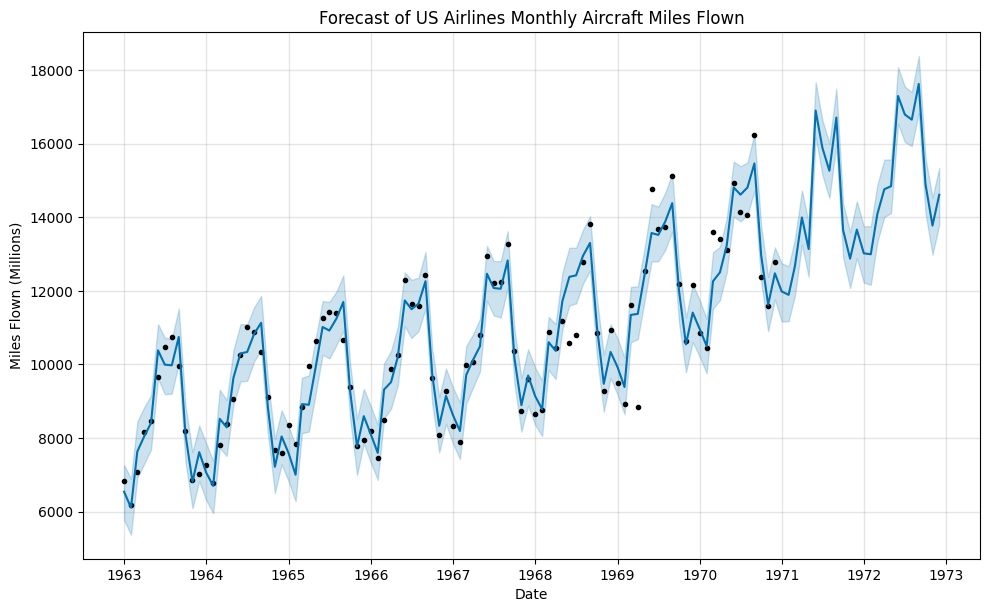

In [44]:
#Plot Forecast
fig1 = model.plot(forecast)
plt.title('Forecast of US Airlines Monthly Aircraft Miles Flown')
plt.xlabel('Date')
plt.ylabel('Miles Flown (Millions)')
plt.show()

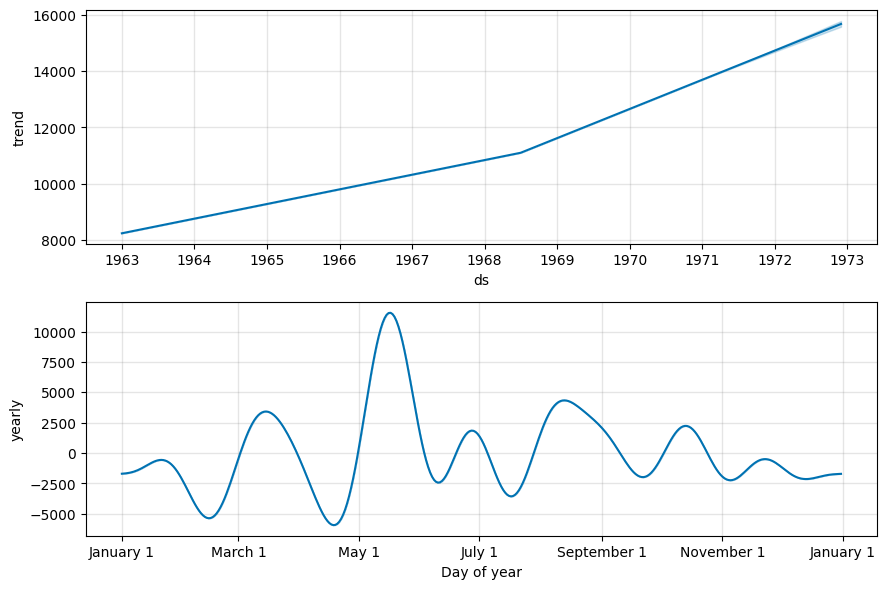

In [45]:
#Plot Components (Trend, Seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [47]:
# Evaluate Model (Optional: Mean Absolute Error)
# Last 12 months ko test set ke roop mein use karo
train = df.iloc[:-12]  # Training ke liye last 12 months chhod do
test = df.iloc[-12:]   # Test ke liye last 12 months

In [48]:
# Train model on training data
model_train = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model_train.fit(train)

# Predict on test data
future_test = model_train.make_future_dataframe(periods=12, freq='M')
forecast_test = model_train.predict(future_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrbj4a8k/sao18rg9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmrbj4a8k/hkbmxfoz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99044', 'data', 'file=/tmp/tmpmrbj4a8k/sao18rg9.json', 'init=/tmp/tmpmrbj4a8k/hkbmxfoz.json', 'output', 'file=/tmp/tmpmrbj4a8k/prophet_modelihxvo4ep/prophet_model-20250605232652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:26:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:26:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [49]:
# Calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
y_true = test['y'].values
y_pred = forecast_test['yhat'].tail(12).values
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae:.2f} million miles')

Mean Absolute Error: 663.86 million miles
